In [1]:
#Predict the likelihood of a person having autism using survey and demographic variables.
#Explore Autism across Gender, Age, and other variables


#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
#Importing the Data

df= pd.read_csv('autism_screening.csv')

In [3]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [5]:
#Setting Display options to ensure feature name visibility

pd.set_option('display.max_columns',None)

#Warning Suspension

import warnings
warnings.filterwarnings('ignore')

In [6]:
#Checking null Values

df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [7]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [8]:
#Start Cleaning the data
#Rename coulumn names

In [9]:
#rename  : 'jundice', 'austim', 'contry_of_res','austim':'family member with PDD'
df = df.rename(columns={'jundice':'jaundice', 'Class/ASD': 'has_ASD','contry_of_res':'country_of_res' , 'austim':'family member with PDD'})

In [10]:
#remove: 'age_desc'
#df_num=df
df.drop(['age_desc'], inplace =True, axis=1)
df['ethnicity'] = df['ethnicity'].replace('?', 'Others')
df['ethnicity'] = df['ethnicity'].replace('others', 'Others')
df['ethnicity'].unique()

array(['White-European', 'Latino', 'Others', 'Black', 'Asian',
       'Middle Eastern ', 'Pasifika', 'South Asian', 'Hispanic',
       'Turkish'], dtype=object)

In [11]:
df['age'] = df['age'].fillna(np.round(df['age'].mean(), 0))
df.isnull().sum()

A1_Score                  0
A2_Score                  0
A3_Score                  0
A4_Score                  0
A5_Score                  0
A6_Score                  0
A7_Score                  0
A8_Score                  0
A9_Score                  0
A10_Score                 0
age                       0
gender                    0
ethnicity                 0
jaundice                  0
family member with PDD    0
country_of_res            0
used_app_before           0
result                    0
relation                  0
has_ASD                   0
dtype: int64

In [12]:
df['relation'].unique()

array(['Self', 'Parent', '?', 'Health care professional', 'Relative',
       'Others'], dtype=object)

In [13]:
df['relation'] = df['relation'].replace('?', 'Others')
df['relation'].unique()

array(['Self', 'Parent', 'Others', 'Health care professional', 'Relative'],
      dtype=object)

In [14]:
df['A1_Score'].unique()

array([1, 0], dtype=int64)

In [15]:
#Change datatype of age column
df.age = df.age.astype(int)

#Dropping the outliers
#As this is a Adult ASD Screning we will remove people age 17 and under. there is one extreme value in Age with 383 we will drop it.

df.drop(df.index[df['age'] <= 17], inplace = True)
df.drop(df.index[df['age'] == 383], inplace = True)

In [16]:
df['age'].unique()

array([26, 24, 27, 35, 40, 36, 64, 29, 33, 18, 31, 30, 34, 38, 42, 43, 48,
       37, 55, 50, 53, 20, 28, 21, 47, 32, 44, 19, 58, 45, 22, 39, 25, 23,
       54, 60, 41, 46, 56, 61, 59, 52, 49, 51])

In [17]:
df.result = df.result.astype(int)
df['result'].unique()

array([ 6,  5,  8,  2,  9, 10,  3,  0,  1,  4,  7])

In [18]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,family member with PDD,country_of_res,used_app_before,result,relation,has_ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,United States,no,6,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,United States,no,6,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,Others,no,no,Egypt,no,2,Others,NO


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 703
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   A1_Score                685 non-null    int64 
 1   A2_Score                685 non-null    int64 
 2   A3_Score                685 non-null    int64 
 3   A4_Score                685 non-null    int64 
 4   A5_Score                685 non-null    int64 
 5   A6_Score                685 non-null    int64 
 6   A7_Score                685 non-null    int64 
 7   A8_Score                685 non-null    int64 
 8   A9_Score                685 non-null    int64 
 9   A10_Score               685 non-null    int64 
 10  age                     685 non-null    int32 
 11  gender                  685 non-null    object
 12  ethnicity               685 non-null    object
 13  jaundice                685 non-null    object
 14  family member with PDD  685 non-null    object
 15  countr

In [20]:
#Now data looks clean lets continue
#Univariate analysis to see how many People in the dataset have ASD

In [21]:
df['gender'].unique()

array(['f', 'm'], dtype=object)

In [22]:
asd=df.has_ASD.value_counts()
asd

NO     501
YES    184
Name: has_ASD, dtype: int64

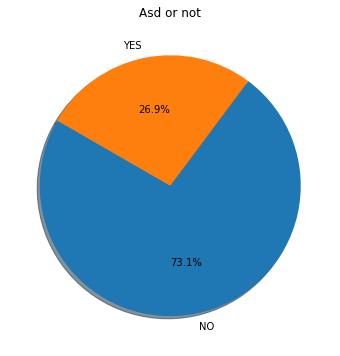

In [23]:
plt.figure(figsize=(12,6))
plt.title('Asd or not')
plt.pie(asd, labels = asd.index, autopct = '%1.1f%%', startangle = 150, shadow=True);# autopct to display percentage in the chart using the formating provided, startangle is to change the direction of the pichart portion


In [24]:
#We can see that out of all the people participated, according to the dataset the people who have ASD is 26.9% 

In [25]:
#Univariate analysis to see how many male and female are in the dataset have ASD

In [26]:
gender=df.gender.value_counts()
gender

m    356
f    329
Name: gender, dtype: int64

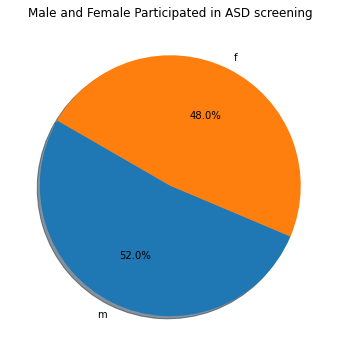

In [27]:
plt.figure(figsize=(12,6))
plt.title('Male and Female Participated in ASD screening')
plt.pie(gender, labels = gender.index, autopct = '%1.1f%%', startangle = 150, shadow=True);# autopct to display percentage in the chart using the formating provided, startangle is to change the direction of the pichart portion


In [28]:
# From above its clear that there are 52% male and 48% Female participated

In [29]:
ethnicity = df.ethnicity.value_counts().sort_values(ascending=False)
ethnicity

White-European     227
Others             122
Asian              121
Middle Eastern      91
Black               39
South Asian         35
Latino              20
Hispanic            13
Pasifika            11
Turkish              6
Name: ethnicity, dtype: int64

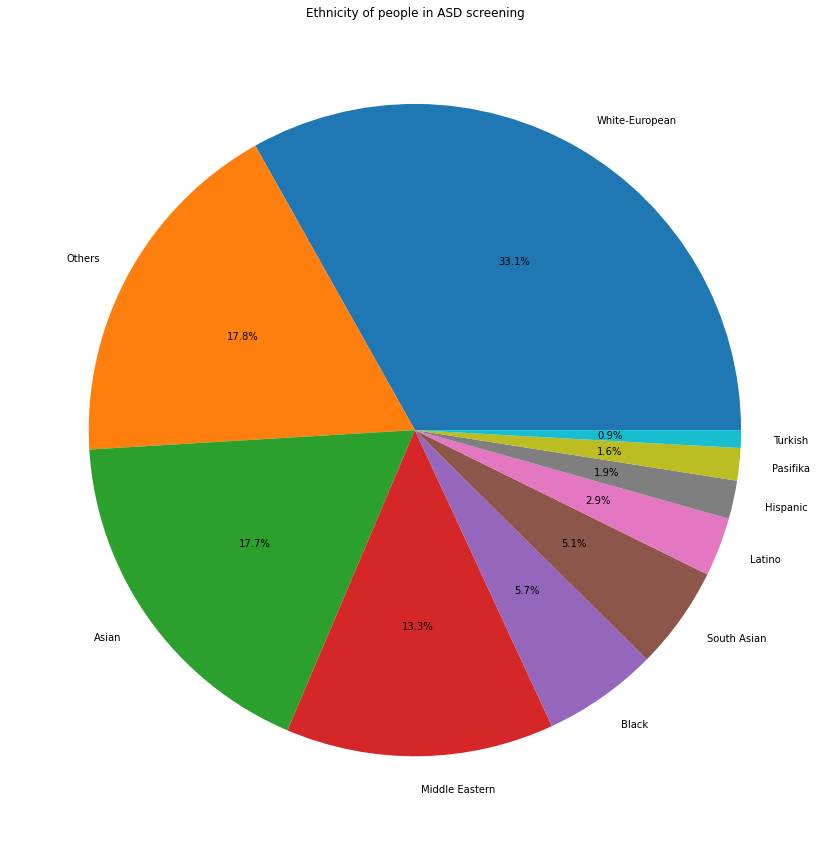

In [30]:
plt.figure(figsize=(20,15))
plt.title('Ethnicity of people in ASD screening')
plt.pie(ethnicity, labels = ethnicity.index, autopct = '%1.1f%%');# autopct to display percentage in the chart using the formating provided, startangle is to change the direction of the pichart portion


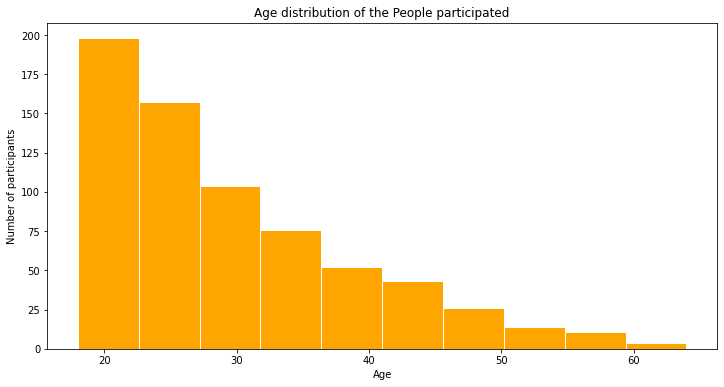

In [31]:
#Age distribution of the participats
plt.figure(figsize=(12,6))
plt.title('Age distribution of the People participated')
plt.xlabel('Age')
plt.ylabel('Number of participants')
plt.hist(df.age,color='orange', edgecolor='white');
plt.show()

In [32]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,family member with PDD,country_of_res,used_app_before,result,relation,has_ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,United States,no,6,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,United States,no,6,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,Others,no,no,Egypt,no,2,Others,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25,f,White-European,no,no,Russia,no,7,Self,YES
700,1,0,0,0,0,0,0,1,0,1,34,m,Hispanic,no,no,Mexico,no,3,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,24,f,Others,no,no,Russia,no,7,Others,YES
702,1,0,0,1,1,0,1,0,1,1,35,m,South Asian,no,no,Pakistan,no,6,Self,NO


In [34]:
#Defining Target and Independent Features
df['ASD']=np.where(df['has_ASD']=="YES",1,0)
df=df.drop(['has_ASD'],axis=1)

In [35]:
#Corelation Matrix
df_num=df[['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score','age','gender','ethnicity','jaundice','family member with PDD','country_of_res','used_app_before','result','relation','ASD']]


In [36]:
df_num['family member with PDD']= np.where(df_num['family member with PDD']=='yes', 1,0)
df_num['jaundice']= np.where(df_num['jaundice']=='yes', 1,0)

In [37]:
df_num['used_app_before']= np.where(df_num['used_app_before']=='yes', 1,0)

In [38]:
df_num['gender']= np.where(df_num['gender']=='m', 1,0)

In [39]:
df_num.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,family member with PDD,country_of_res,used_app_before,result,relation,ASD
0,1,1,1,1,0,0,1,1,0,0,26,0,White-European,0,0,United States,0,6,Self,0
1,1,1,0,1,0,0,0,1,0,1,24,1,Latino,0,1,Brazil,0,5,Self,0
2,1,1,0,1,1,0,1,1,1,1,27,1,Latino,1,1,Spain,0,8,Parent,1
3,1,1,0,1,0,0,1,1,0,1,35,0,White-European,0,1,United States,0,6,Self,0
4,1,0,0,0,0,0,0,1,0,0,40,0,Others,0,0,Egypt,0,2,Others,0


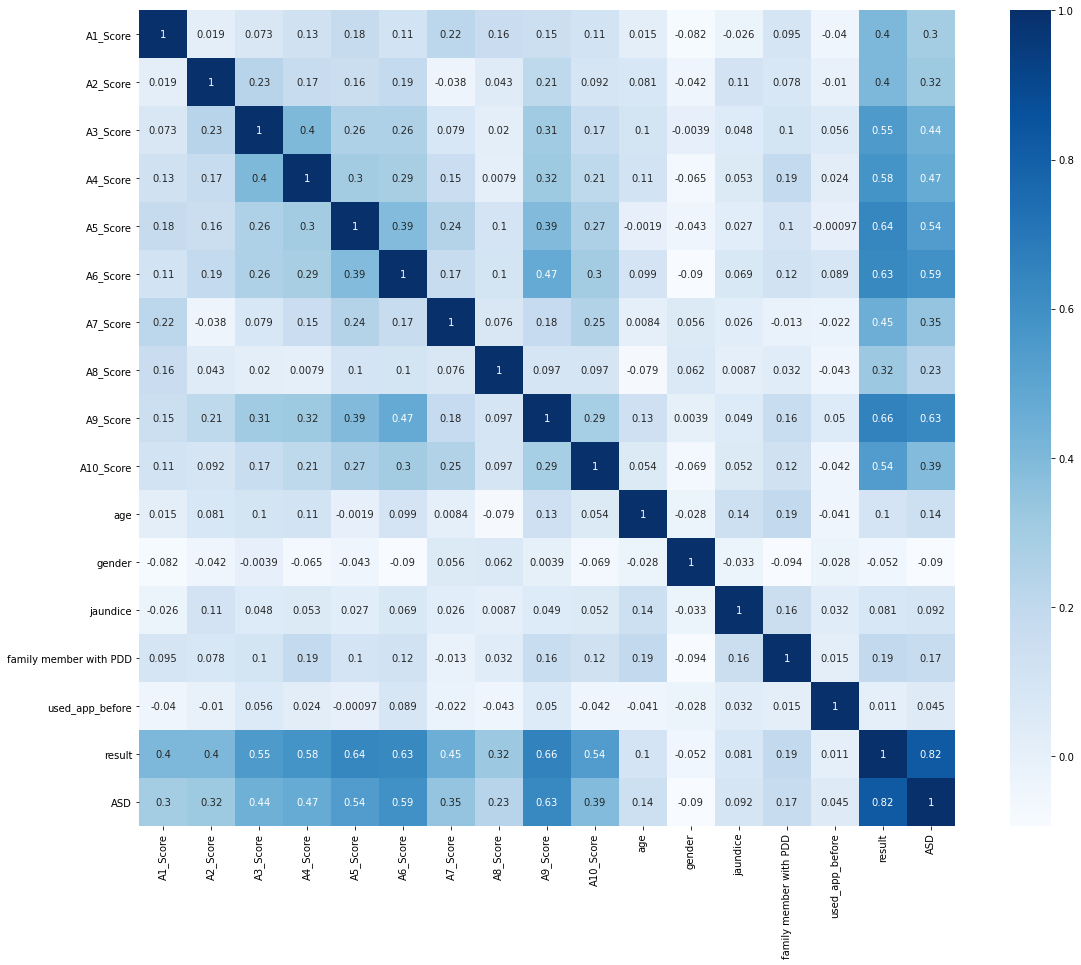

In [40]:
cor = df_num.corr(method= 'pearson')
plt.figure(figsize =(20,15))
sns.heatmap(cor,cmap='Blues',annot = True, square=True);
plt.show()


In [41]:
df_num.corr()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,family member with PDD,used_app_before,result,ASD
A1_Score,1.000000,0.018940,0.072887,0.126659,0.176571,0.112791,0.217492,0.158441,0.149413,0.114437,0.015444,-0.082468,-0.026443,0.094988,-0.040047,0.402907,0.299028
A2_Score,0.018940,1.000000,0.232067,0.167648,0.157484,0.186320,-0.037812,0.042813,0.205961,0.091564,0.081058,-0.041945,0.108669,0.078129,-0.010405,0.404905,0.318722
A3_Score,0.072887,0.232067,1.000000,0.399164,0.259996,0.262482,0.078704,0.020290,0.310325,0.165154,0.104054,-0.003922,0.048093,0.103258,0.056221,0.547983,0.442488
A4_Score,0.126659,0.167648,0.399164,1.000000,0.299368,0.285087,0.150844,0.007912,0.319005,0.206576,0.114477,-0.065345,0.052814,0.187173,0.023621,0.578904,0.467323
A5_Score,0.176571,0.157484,0.259996,0.299368,1.000000,0.390714,0.242777,0.100448,0.394204,0.268929,-0.001911,-0.042658,0.027302,0.101909,-0.000975,0.639323,0.542330
A6_Score,0.112791,0.186320,0.262482,0.285087,0.390714,1.000000,0.174733,0.102996,0.471630,0.301128,0.098692,-0.089648,0.069267,0.116948,0.088947,0.627124,0.591304
A7_Score,0.217492,-0.037812,0.078704,0.150844,0.242777,0.174733,1.000000,0.076372,0.183349,0.248424,0.008396,0.055770,0.026477,-0.013148,-0.022027,0.452661,0.345731
A8_Score,0.158441,0.042813,0.020290,0.007912,0.100448,0.102996,0.076372,1.000000,0.097102,0.096930,-0.079357,0.062475,0.008685,0.031612,-0.043234,0.324061,0.233067
A9_Score,0.149413,0.205961,0.310325,0.319005,0.394204,0.471630,0.183349,0.097102,1.000000,0.289737,0.132826,0.003901,0.048734,0.162946,0.050188,0.656662,0.628894
A10_Score,0.114437,0.091564,0.165154,0.206576,0.268929,0.301128,0.248424,0.096930,0.289737,1.000000,0.054470,-0.069251,0.052306,0.120289,-0.041995,0.540747,0.390797


In [42]:
country =df.country_of_res.value_counts()
country

United States           109
United Arab Emirates     81
India                    80
New Zealand              76
United Kingdom           76
                       ... 
Lebanon                   1
Oman                      1
Tonga                     1
China                     1
Cyprus                    1
Name: country_of_res, Length: 66, dtype: int64

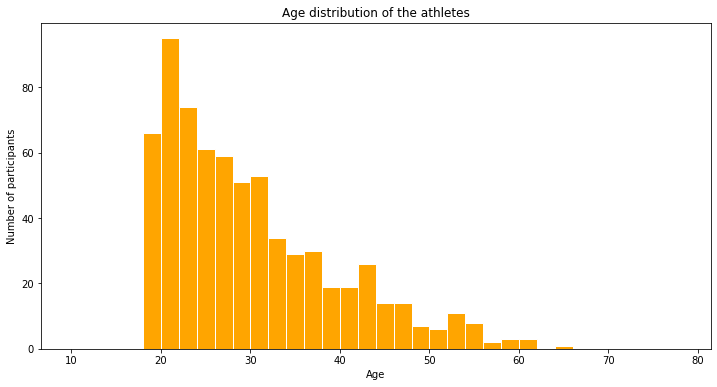

In [43]:
#Age distribution of the participats

plt.figure(figsize=(12,6))
plt.title('Age distribution of the athletes')
plt.xlabel('Age')
plt.ylabel('Number of participants')
plt.hist(df.age, bins= np.arange(10,80,2),color='orange', edgecolor='white');
plt.show()

In [44]:
gender_counts= df.gender.value_counts()
gender_counts

m    356
f    329
Name: gender, dtype: int64

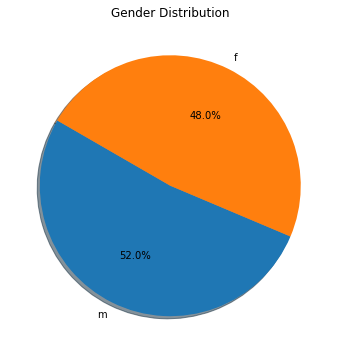

In [45]:
plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender_counts, labels = gender_counts.index, autopct = '%1.1f%%', startangle = 150, shadow=True);# autopct to display percentage in the chart using the formating provided, startangle is to change the direction of the pichart portion


# Lets analyse only people with ASD

In [46]:
positive= df[(df.ASD== 1)]
positive

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,family member with PDD,country_of_res,used_app_before,result,relation,ASD
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,Parent,1
5,1,1,1,1,1,0,1,1,1,1,36,m,Others,yes,no,United States,no,9,Self,1
10,1,1,1,1,1,1,1,1,1,1,33,m,White-European,no,no,United States,no,10,Relative,1
31,1,0,0,1,1,1,1,1,0,1,37,f,White-European,no,yes,United States,no,7,Self,1
33,1,1,1,1,1,1,1,1,1,1,18,f,White-European,yes,no,South Africa,no,10,Self,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,1,1,1,1,1,1,0,1,1,1,31,m,Turkish,no,yes,Australia,no,9,Self,1
698,1,1,1,1,1,1,1,1,1,1,27,f,Pasifika,no,no,Australia,no,10,Self,1
699,0,1,0,1,1,0,1,1,1,1,25,f,White-European,no,no,Russia,no,7,Self,1
701,1,0,1,1,1,0,1,1,0,1,24,f,Others,no,no,Russia,no,7,Others,1


In [47]:
gender_POS=positive.gender.value_counts()
gender_POS

f    102
m     82
Name: gender, dtype: int64

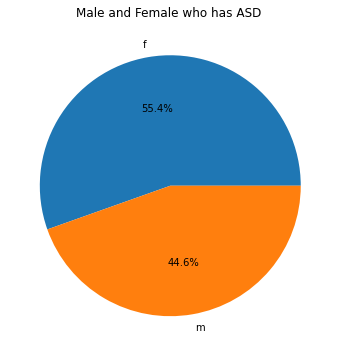

In [48]:
plt.figure(figsize=(12,6))
plt.title('Male and Female who has ASD ')
plt.pie(gender_POS, labels = gender_POS.index, autopct = '%1.1f%%');# autopct to display percentage in the chart using the formating provided, startangle is to change the direction of the pichart portion


In [49]:
#|Above we can see there are 55.4% Females and 44.6 males who has diagnised with ASD in the data

In [50]:
ethnicity_ASD = positive.ethnicity.value_counts().sort_values(ascending=False)
ethnicity_ASD

White-European     108
Others              17
Black               17
Asian               14
Latino              10
Middle Eastern       8
Hispanic             5
South Asian          3
Turkish              1
Pasifika             1
Name: ethnicity, dtype: int64

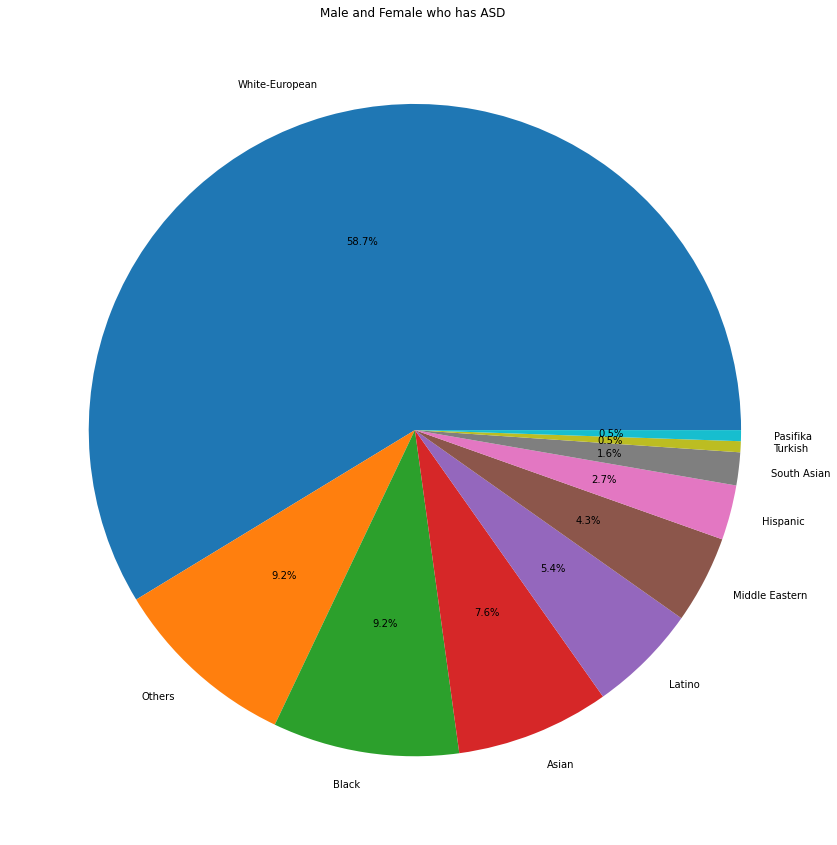

In [51]:
plt.figure(figsize=(20,15))
plt.title('Male and Female who has ASD ')
plt.pie(ethnicity_ASD, labels = ethnicity_ASD.index, autopct = '%1.1f%%');

In [52]:
#The White Europian Ethnic people has diagnosised with ASD

In [53]:
#Top Countries participating
top_10_countries_res = df.country_of_res.value_counts().sort_values(ascending=False).head(10)
top_10_countries_res

United States           109
United Arab Emirates     81
India                    80
New Zealand              76
United Kingdom           76
Jordan                   47
Australia                27
Sri Lanka                14
Canada                   14
Afghanistan              13
Name: country_of_res, dtype: int64

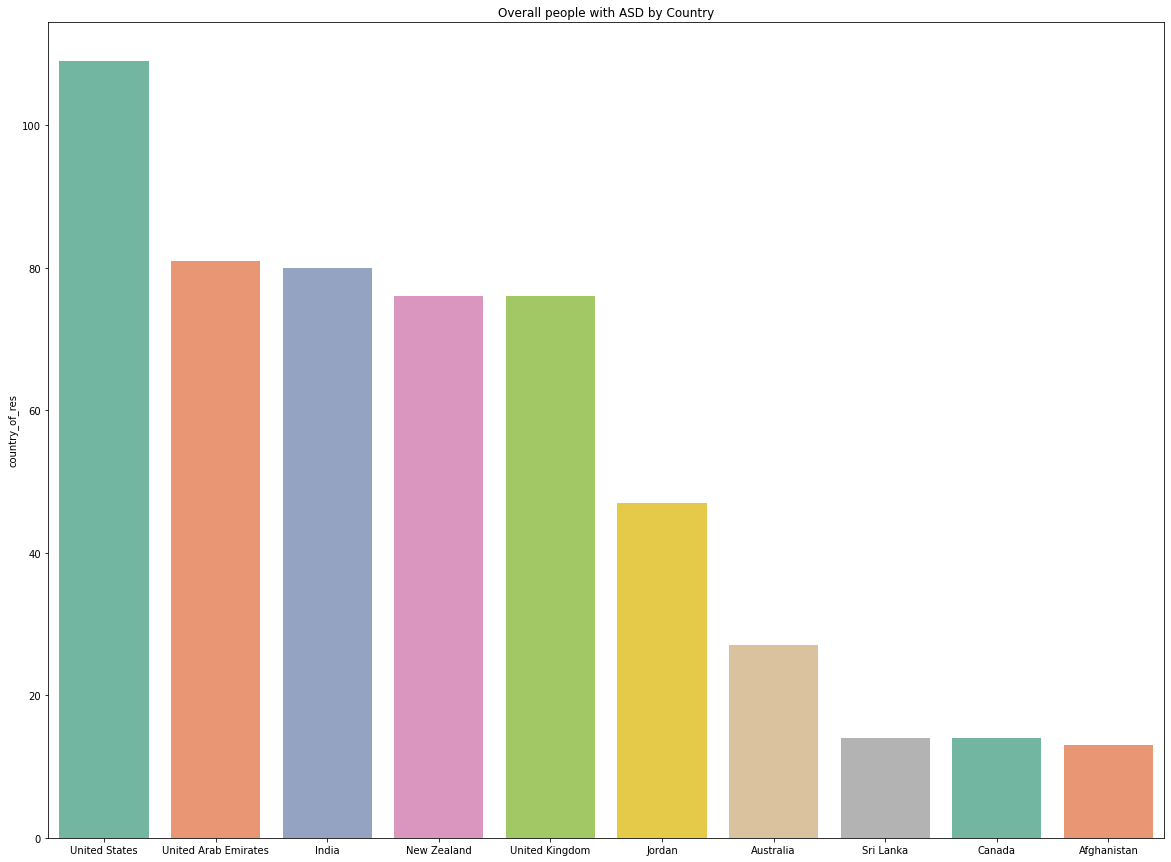

In [54]:
plt.figure(figsize=(20,15))

plt.title('Overall people with ASD by Country')
sns.barplot(x= top_10_countries_res.index, y=top_10_countries_res,palette = 'Set2');

In [55]:
#People with ASD from Top 10 countries 

In [56]:
female_participants = positive[(positive.gender == 'f')& (positive.country_of_res == 'United States')]
female_participants.tail()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,family member with PDD,country_of_res,used_app_before,result,relation,ASD
522,1,1,1,1,1,0,1,0,1,0,47,f,White-European,yes,yes,United States,no,7,Self,1
558,1,1,1,1,1,1,1,1,0,1,22,f,White-European,no,no,United States,no,9,Self,1
560,1,1,1,1,1,1,1,0,1,1,39,f,White-European,no,yes,United States,no,9,Self,1
678,1,1,1,1,1,0,0,1,1,1,43,f,Black,no,no,United States,no,8,Self,1
681,1,1,0,1,1,1,1,1,1,1,49,f,Hispanic,no,no,United States,no,9,Self,1


Text(0.5, 1.0, 'Female Participation in USA with Jaundice')

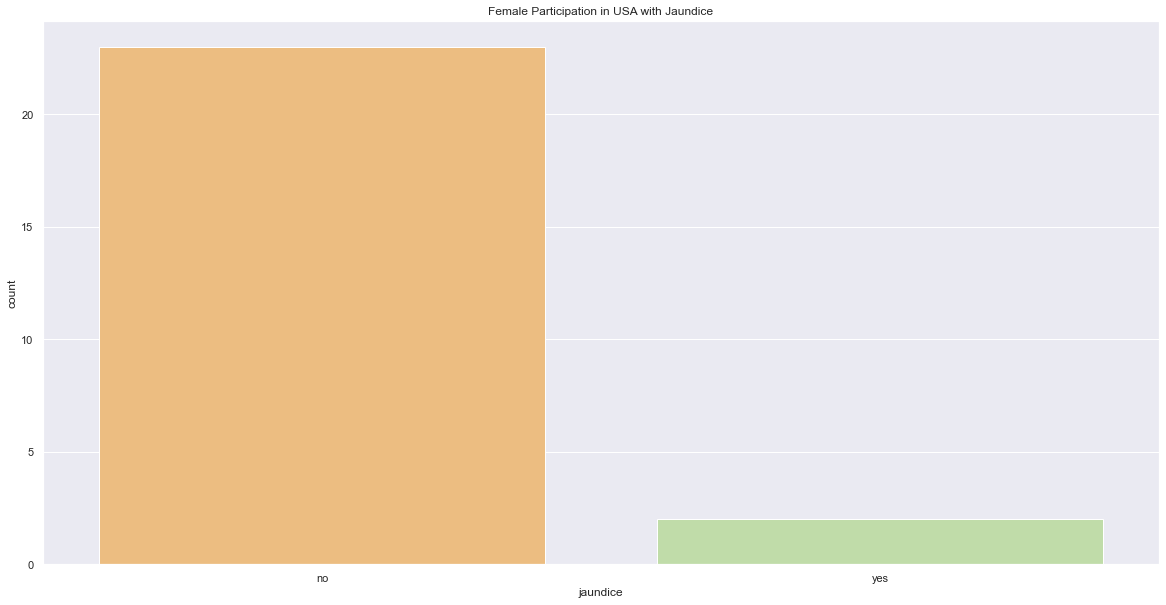

In [57]:
#Female Participation in USA with Jaundice
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
sns.countplot(x='jaundice', data= female_participants, palette='Spectral')
plt.title('Female Participation in USA with Jaundice')

Female Participants who have asd with family member with PDD

Text(0.5, 1.0, 'female participantswho have asd with family member with PDD')

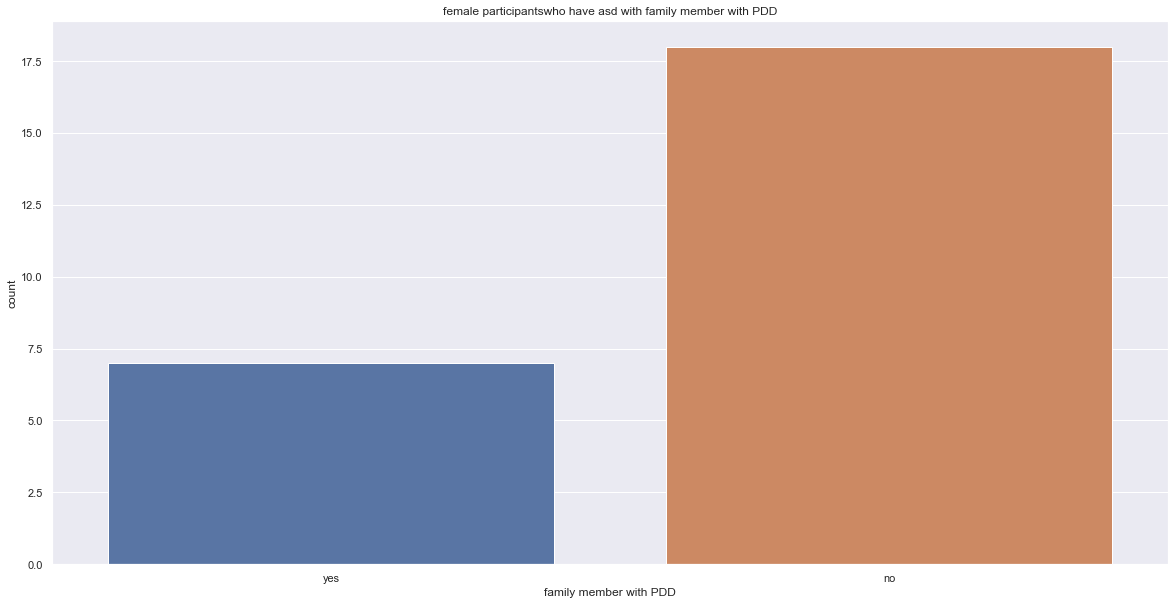

In [58]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
sns.countplot(x='family member with PDD', data= female_participants)
plt.title('female participantswho have asd with family member with PDD')

Text(0.5, 1.0, 'Female Participation in USA and their age')

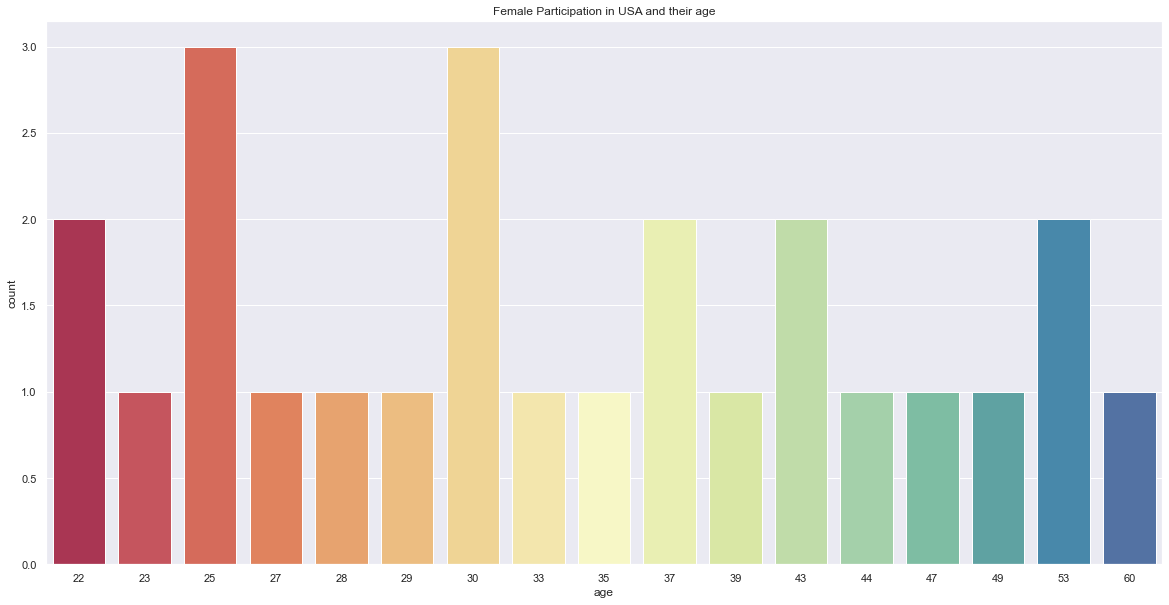

In [59]:
#Female Participation with ASD in USA and their age
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
sns.countplot(x='age', data= female_participants, palette='Spectral')
plt.title('Female Participation in USA and their age')

In [60]:
#ALL Female Participation with ASD and their age
female_participants_all = positive[(positive.gender == 'f')]

Text(0.5, 1.0, 'Female Participation and their age')

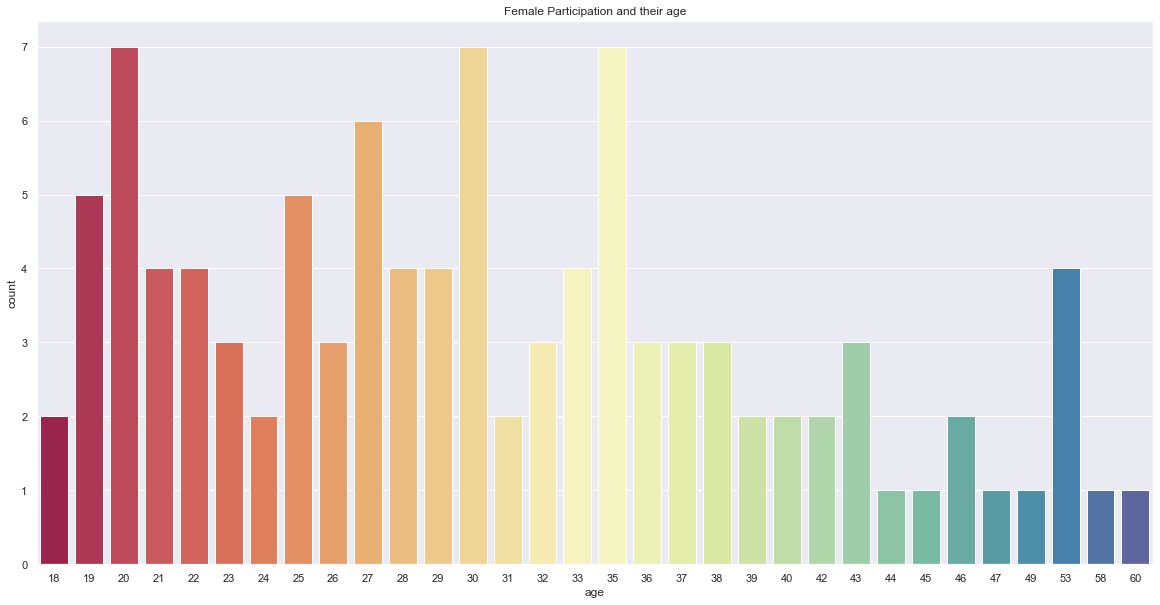

In [61]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
sns.countplot(x='age', data= female_participants_all, palette='Spectral')
plt.title('Female Participation and their age')

Text(0.5, 1.0, 'Female Participation and their ethnicity')

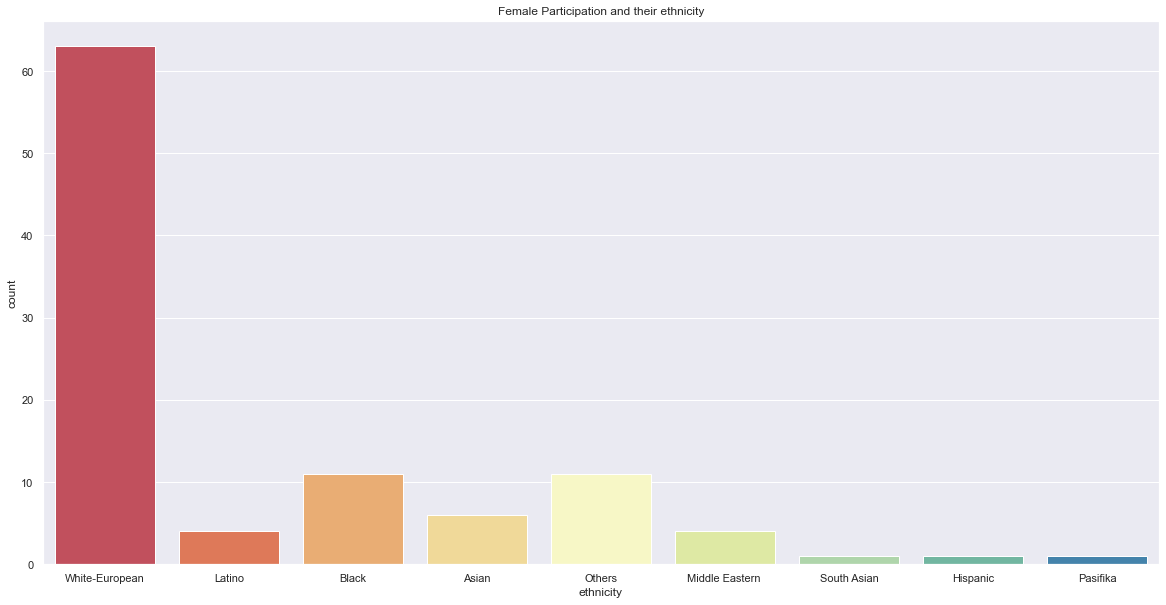

In [62]:
#All Female Participation with ASD and their ethnicity
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
sns.countplot(x='ethnicity', data= female_participants_all, palette='Spectral')
plt.title('Female Participation and their ethnicity')

Text(0.5, 1.0, 'Female Participation and Jaundice')

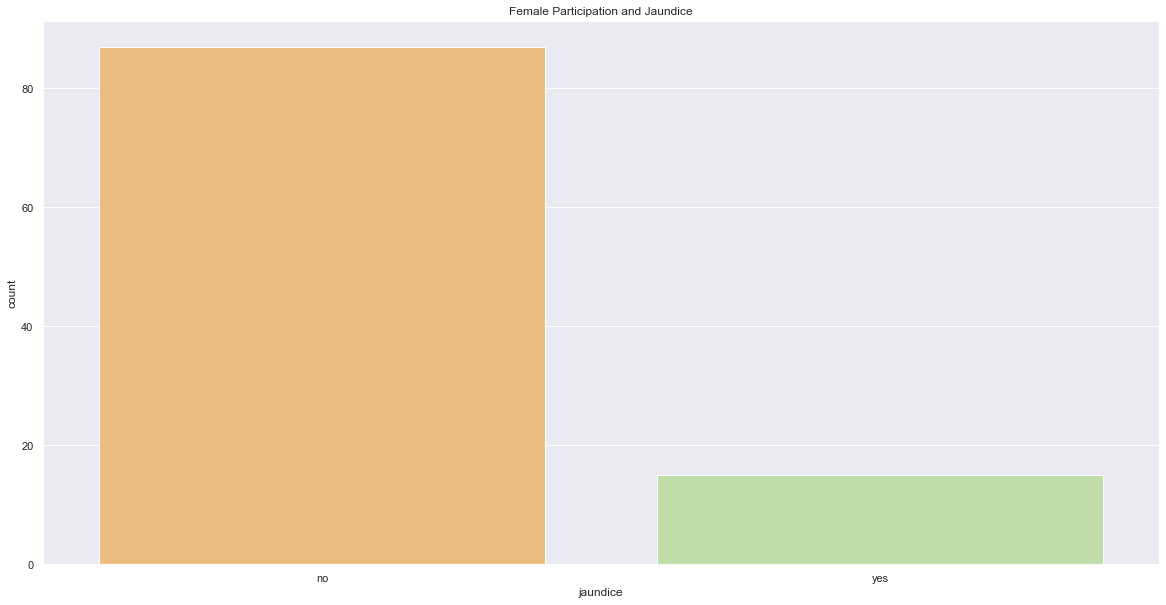

In [63]:
#All Female Participats with ASD and Jaundice
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
sns.countplot(x='jaundice', data= female_participants_all, palette='Spectral')
plt.title('Female Participation and Jaundice')

Text(0.5, 1.0, 'Female Participants and their country of residence')

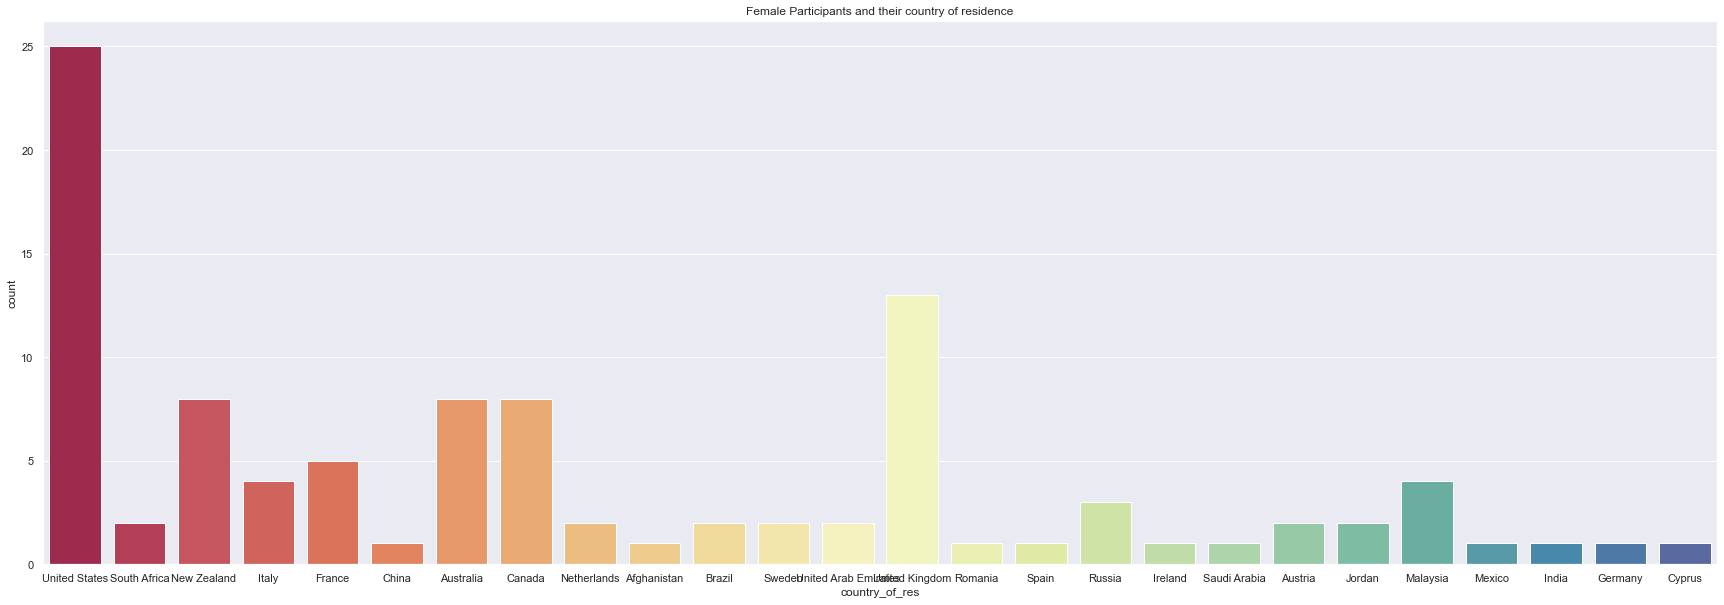

In [64]:
#All Female Participats and their country of residence
sns.set(style='darkgrid')
plt.figure(figsize=(30,10))
sns.countplot(x='country_of_res', data= female_participants_all, palette='Spectral')
plt.title('Female Participants and their country of residence')

In [65]:
male_participants = positive[(positive.gender == 'm')]

Text(0.5, 1.0, 'male Participation and their age')

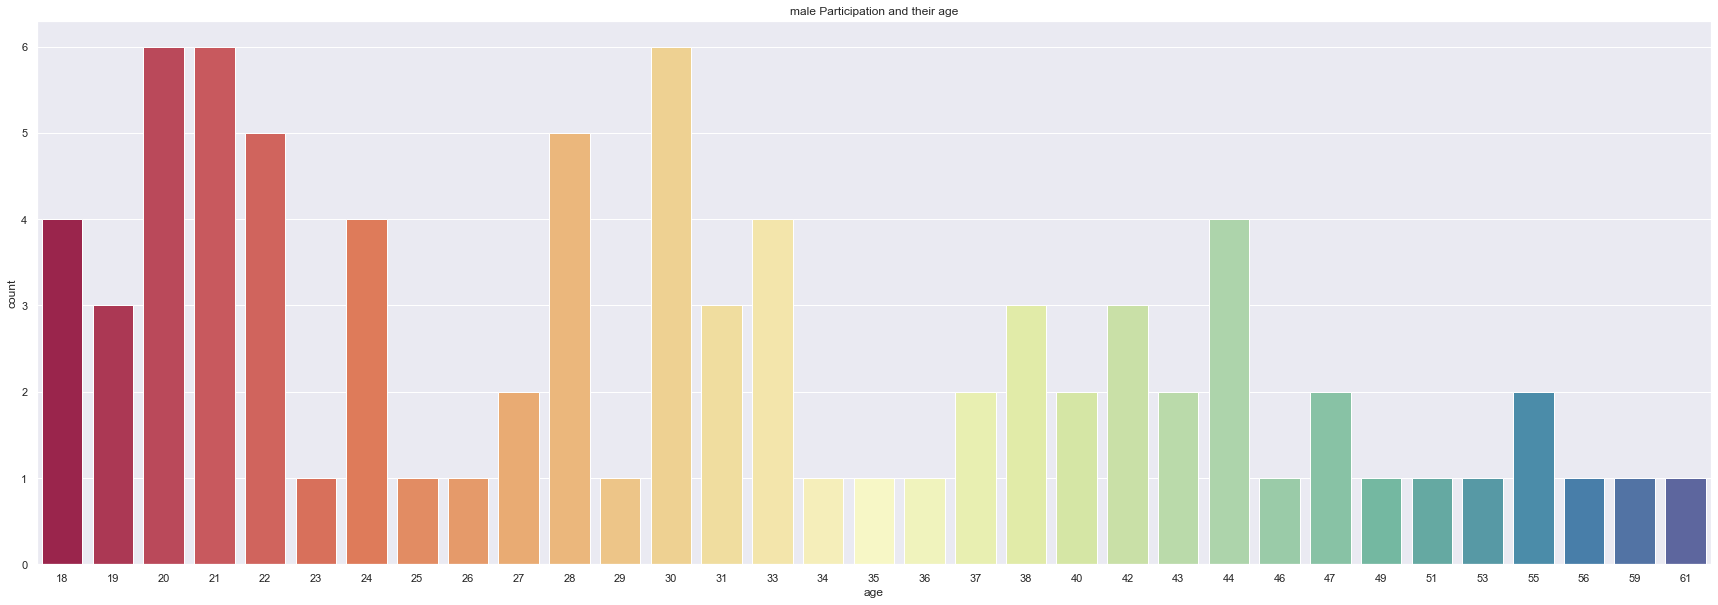

In [66]:
sns.set(style='darkgrid')
plt.figure(figsize=(30,10))
sns.countplot(x='age', data= male_participants, palette='Spectral')
plt.title('male Participation and their age')

Text(0.5, 1.0, 'male Participation and their country of residence')

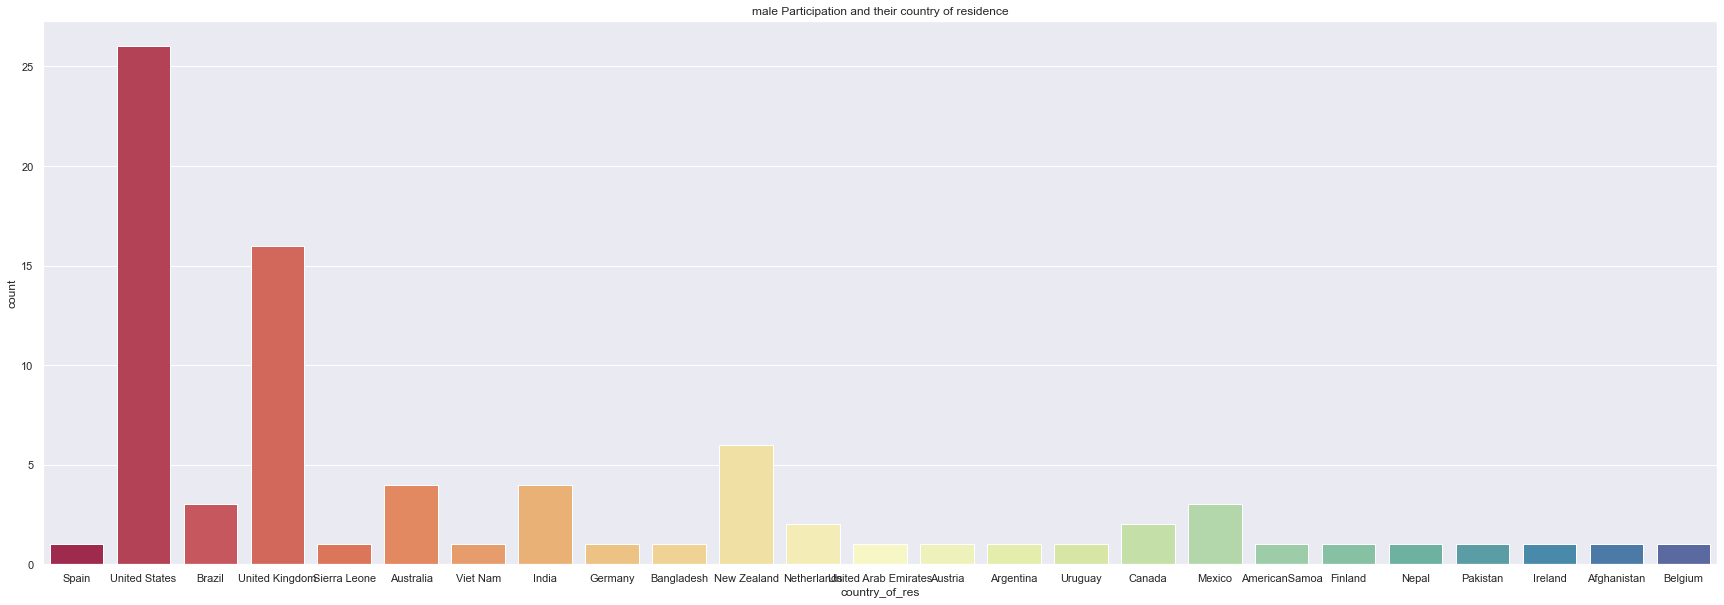

In [67]:
sns.set(style='darkgrid')
plt.figure(figsize=(30,10))
sns.countplot(x='country_of_res', data= male_participants, palette='Spectral')
plt.title('male Participation and their country of residence')

Text(0.5, 1.0, 'male Participants and their ethnicity')

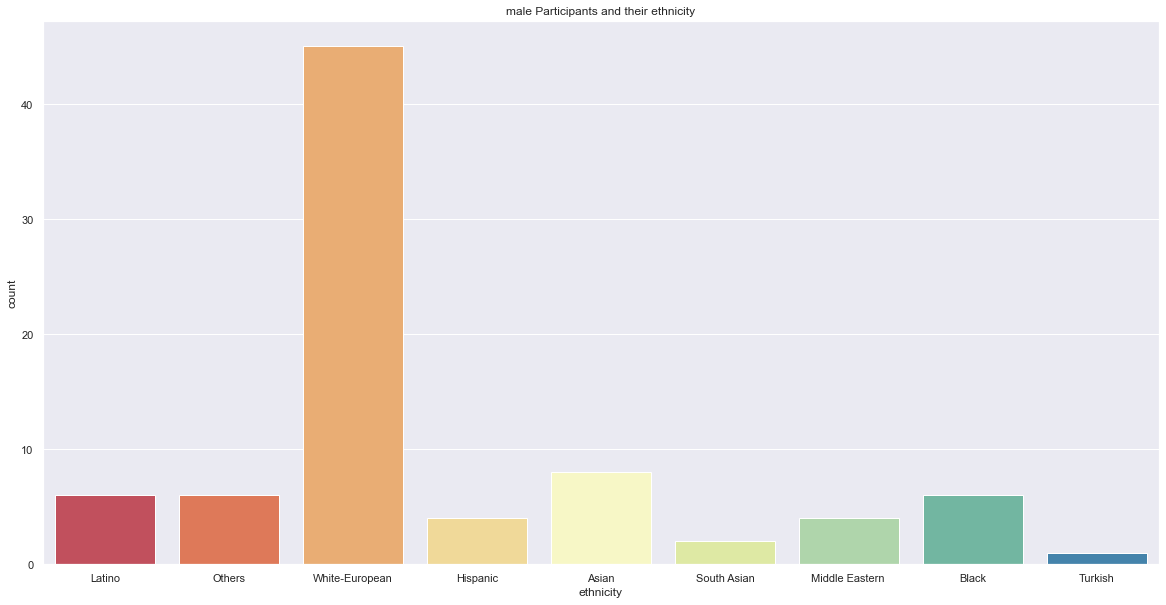

In [68]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
sns.countplot(x='ethnicity', data= male_participants, palette='Spectral')
plt.title('male Participants and their ethnicity')

In [ ]:
# More Analysis, like who male female/male participants belonging to white europian ethnic group, has jaundice, live in USA  and what is their age?

In [71]:
female_participants_detail = positive[(positive.gender == 'f')& (positive.country_of_res == 'United States') & (positive.ethnicity == 'White-European') & (positive.jaundice == 'yes')]
female_participants_detail

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,family member with PDD,country_of_res,used_app_before,result,relation,ASD
464,1,1,0,1,1,1,1,1,0,1,29,f,White-European,yes,no,United States,no,8,Self,1
522,1,1,1,1,1,0,1,0,1,0,47,f,White-European,yes,yes,United States,no,7,Self,1


In [72]:
male_participants_detail = positive[(positive.gender == 'm')& (positive.country_of_res == 'United States') & (positive.ethnicity == 'White-European') & (positive.jaundice == 'yes')]
male_participants_detail

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,family member with PDD,country_of_res,used_app_before,result,relation,ASD
149,1,1,1,1,1,0,1,1,1,0,35,m,White-European,yes,yes,United States,no,8,Self,1
694,1,1,1,1,1,0,0,1,0,1,27,m,White-European,yes,no,United States,no,7,Self,1


In [ ]:
male_participants = positive[(positive.gender == 'm')& (positive.country_of_res == 'United States')]
male_participants.tail()